<a href="https://colab.research.google.com/github/dftow01/dataengineering/blob/main/A192066_TTTC3213_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Web Scarping from Booking.com**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def get_hotel_info(page):
    url = f'https://www.booking.com/searchresults.en-gb.html?ss=Kuala+Lumpur%2C+Kuala+Lumpur+Federal+Territory%2C+Malaysia&efdco=1&label=bra115jc-1DCAEoggI46AdIM1gDaKEBiAEBmAEJuAEHyAEM2AED6AEBiAIBqAIDuAKVvMq6BsACAdICJDNiNjRkNjNhLTVhODgtNDMyMS1hOTI5LTc1YTA2Y2VkYzdlNdgCBOACAQ&sid=8c6109f51b64dc2a1c4fbdd1c8ff750f&aid=2425901&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2403010&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=ffac2fca71a80160&ac_meta=GhBmZmFjMmZjYTcxYTgwMTYwIAAoATICZW46Bkt1YWxhIEAASgBQAA%3D%3D&checkin=2025-01-30&checkout=2025-01-31&group_adults=2&no_rooms=1&group_children=0'

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    }
    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.content, 'html.parser')

    hotels = soup.find_all('div', class_='c066246e13 d8aec464ca')

    hotel_data = []
    for hotel in hotels:
        name_tag = hotel.find('h3', class_='aab71f8e4e')
        price_tag = hotel.find('span', class_='f6431b446c fbfd7c1165 e84eb96b1f')
        distance_tag = hotel.find('span', {'data-testid': 'distance'})
        name = name_tag.text.strip() if name_tag else 'No name'
        price = price_tag.text.strip() if price_tag else 'No price'
        distance = distance_tag.text.strip() if distance_tag else 'No distance'
        hotel_data.append([name, price, distance])

    return hotel_data

all_hotels = []
for page in range(1, 7):
      print(f"Scraping page {page}")
      hotels = get_hotel_info(page)
      all_hotels.extend(hotels)




Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6


## **Convert List to Dataframe**

In [ ]:
df = pd.DataFrame(all_hotels, columns=['Hotel_Name', 'Price' , 'Distance'])

## **Text Parsing and Cleaning**

### **Before**

In [ ]:
df

,Hotel_Name,Price,Distance
0,KLCC Agile Service SuitesOpens in new window,US$150,1 miles from centre
1,3 Towers Jalan Ampang By Serenity Vacation Hom...,US$46,2.5 miles from centre
2,Santa Grand Signature Kuala LumpurOpens in new...,US$82,0.5 miles from centre
3,Cosmo Hotel Kuala LumpurOpens in new window,US$27,0.9 miles from centre
4,The Très HotelOpens in new window,US$41,2.9 miles from centre
...,...,...,...
145,Alila Bangsar Kuala LumpurOpens in new window,US$91,2.7 miles from centre
146,Chinatown Hostel by MingleOpens in new window,US$16,1 miles from centre
147,VE Hotel & ResidenceOpens in new window,US$53,4.2 miles from centre
148,MoMo's Kuala LumpurOpens in new window,US$29,0.9 miles from centre


### **After**

In [ ]:
df['Hotel_Name'] = df['Hotel_Name'].str.replace('Opens in new window', '').str.strip()
df["Hotel_Name"] = df['Hotel_Name'].str.strip().str.lower()
df["Hotel_Name"] = df['Hotel_Name'].str.strip().str.lower()
df["Hotel_Name"] = df["Hotel_Name"].str.replace(r'\s+', ' ', regex=True).str.strip()
df['Price'] = df['Price'].str.replace('US$', '').str.strip()
df['Distance'] = df['Distance'].str.replace('miles from centre', '').str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df

,Hotel_Name,Price,Distance
0,klcc agile service suites,150,1
1,3 towers jalan ampang by serenity vacation homes,46,2.5
2,santa grand signature kuala lumpur,82,0.5
3,cosmo hotel kuala lumpur,27,0.9
4,the très hotel,41,2.9
...,...,...,...
145,alila bangsar kuala lumpur,91,2.7
146,chinatown hostel by mingle,16,1
147,ve hotel & residence,53,4.2
148,momo's kuala lumpur,29,0.9


## **Convert Price to Numeric type**

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

## **Remove Duplicates**

### **Before**

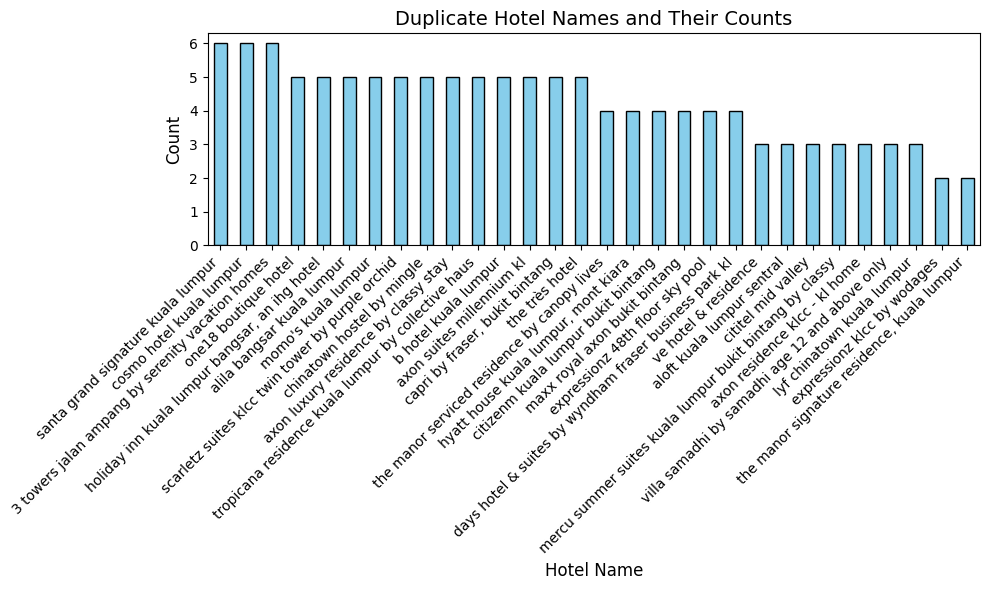

In [ ]:
import matplotlib.pyplot as plt

duplicate_counts = df["Hotel_Name"].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]


plt.figure(figsize=(10, 6))
duplicates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Duplicate Hotel Names and Their Counts", fontsize=14)
plt.xlabel("Hotel Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### **After**

In [ ]:
df_unique = df.drop_duplicates(subset=['Hotel_Name'])
df_unique.reset_index(drop=True, inplace=True)
print("Original DataFrame:")
print(df)

print("\nDataFrame After Removing Duplicates:")
print(df_unique)

Original DataFrame:
                                           Hotel_Name  Price Distance
0                           klcc agile service suites    150        1
1    3 towers jalan ampang by serenity vacation homes     46      2.5
2                  santa grand signature kuala lumpur     82      0.5
3                            cosmo hotel kuala lumpur     27      0.9
4                                      the très hotel     41      2.9
..                                                ...    ...      ...
145                        alila bangsar kuala lumpur     91      2.7
146                        chinatown hostel by mingle     16        1
147                              ve hotel & residence     53      4.2
148                               momo's kuala lumpur     29      0.9
149       the manor signature residence, kuala lumpur     73      0.8

[150 rows x 3 columns]

DataFrame After Removing Duplicates:
                                           Hotel_Name  Price Distance
0       

## **Remove outliers**

### **Before**

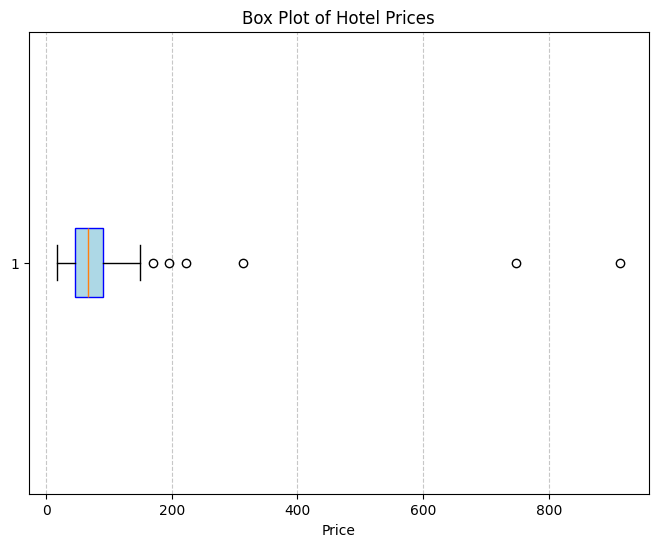

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_unique['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of Hotel Prices')
plt.xlabel('Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_unique['Price'].describe()

,Price
count,53.000000
mean,106.641509
std,155.122420
min,17.000000
25%,46.000000
50%,67.000000
75%,91.000000
max,914.000000


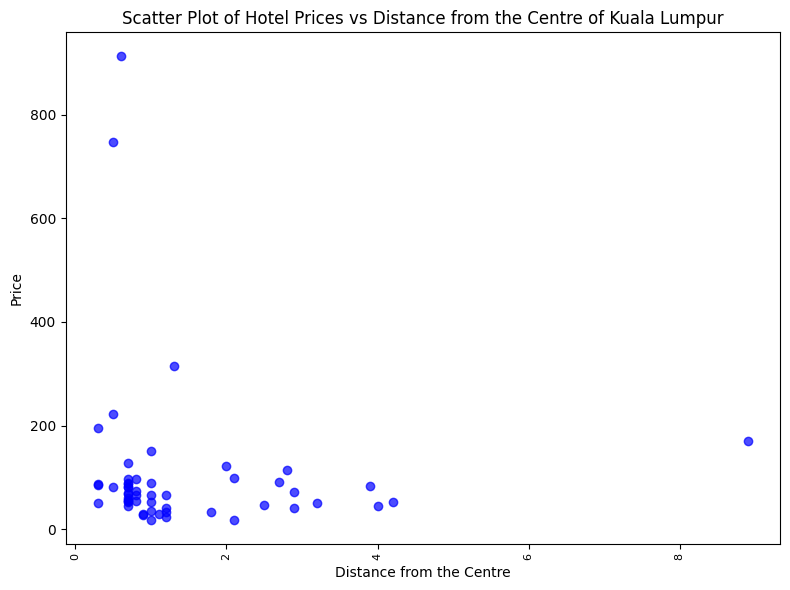

In [ ]:
df_unique['Distance'] = df_unique['Distance'].astype(float)
df_unique = df_unique.sort_values(by='Distance', ascending=True)

plt.figure(figsize=(8, 6))
plt.scatter(df_unique['Distance'], df_unique['Price'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Hotel Prices vs Distance from the Centre of Kuala Lumpur')
plt.xlabel('Distance from the Centre')
plt.ylabel('Price')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


### **After**

In [ ]:
Q1 = df_unique['Price'].quantile(0.25)
Q3 = df_unique['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_no_outliers = df_unique[(df_unique['Price'] >= lower_bound) & (df_unique['Price'] <= upper_bound)]

print("Original DataFrame:")
print(df_unique)

print("\nDataFrame After Removing Outliers:")
print(df_no_outliers)

Original DataFrame:
                                           Hotel_Name  Price  Distance
21  mercu summer suites kuala lumpur bukit bintang...     51       0.3
37                           grand hyatt kuala lumpur    195       0.3
9   tropicana residence kuala lumpur by collective...     85       0.3
40                                 impiana klcc hotel     87       0.3
2                  santa grand signature kuala lumpur     82       0.5
33                    four seasons hotel kuala lumpur    748       0.5
39                      the ruma hotel and residences    223       0.5
52                       star sky view suites at klcc    914       0.6
44                   hotel quill residence by tasrifa     45       0.7
25               axon luxury residence by classy stay     55       0.7
24                           axon residence by classy     87       0.7
22                         lyf chinatown kuala lumpur     60       0.7
18                      axon residence klcc - kl home    

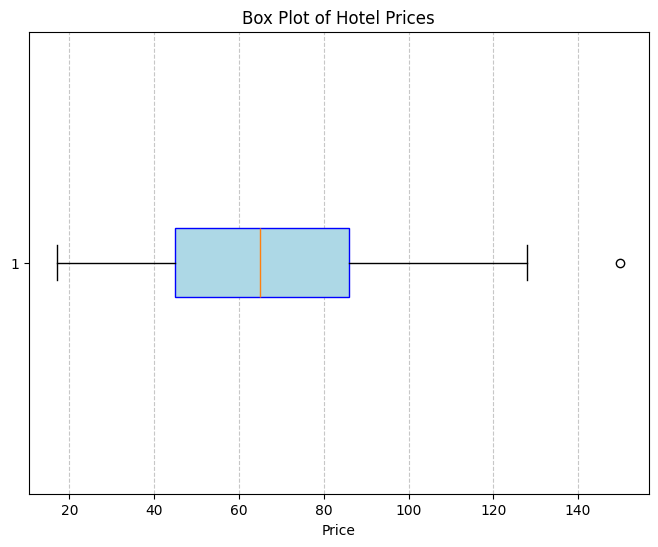

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of Hotel Prices')
plt.xlabel('Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


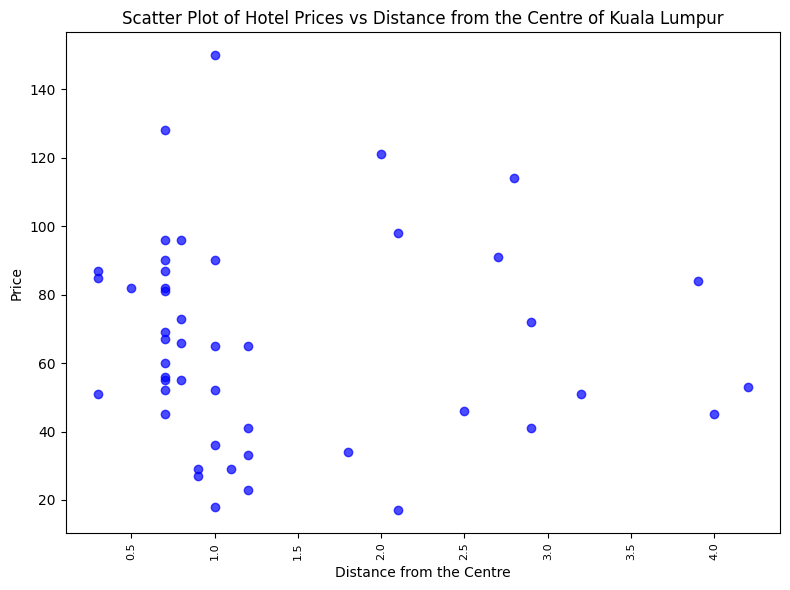

In [ ]:
df_no_outliers['Distance'] = df_no_outliers['Distance'].astype(float)
df_no_outliers = df_no_outliers.sort_values(by='Distance', ascending=True)

plt.figure(figsize=(8,6))
plt.scatter(df_no_outliers['Distance'], df_no_outliers['Price'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Hotel Prices vs Distance from the Centre of Kuala Lumpur')
plt.xlabel('Distance from the Centre')
plt.ylabel('Price')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
df_no_outliers.to_csv('cleaned_hotel_data.csv', index=False)